# DSA210 Term Project - Alp Çetintaş - 32550
## 1.Export and Prepare Data
- The data was easily exported through Google Takeout. I only had to choose which datasets I wanted to download (watch history, search history, subscriptions...) and the format.
- I have two Youtube accounts that I used throught the years so Im going to have to merge the datasets.
1.  Account 1 (Used between 2020-2022)
1.  Account 2 (Used between 2022 - today)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

watch_history_path1 = "../../youtube_data1/geçmiş/izleme geçmişi.json"
search_history_path1 = "../../youtube_data1/geçmiş/arama geçmişi.json"
subscriptions_path1 = "../../youtube_data1/abonelikler/abonelikler.csv"
comments_path1 = "../../youtube_data1/yorumlar/yorumlar.csv"

df1 = pd.read_json(watch_history_path1)

watch_history_path2 = "../../youtube_data2/geçmiş/izleme geçmişi.json"
search_history_path2 = "../../youtube_data2/geçmiş/arama geçmişi.json"
subscriptions_path2 = "../../youtube_data2/abonelikler/abonelikler.csv"
comments_path2 = "../../youtube_data2/yorumlar/yorumlar.csv"

df2 = pd.read_json(watch_history_path2)

print("Watch history datasets created.")

Watch history datasets created.


In [2]:
df1.head()

,header,title,titleUrl,time,products,activityControls,subtitles,description,details
0,YouTube,https://www.youtube.com/watch?v=IjpEij4y3w0 ad...,https://www.youtube.com/watch?v=IjpEij4y3w0,2024-10-13T20:49:46.901Z,[YouTube],[YouTube izleme geçmişi],NaN,NaN,NaN
1,YouTube,https://www.youtube.com/watch?v=eaNGNoHJdOA ad...,https://www.youtube.com/watch?v=eaNGNoHJdOA,2024-10-13T20:30:44.963Z,[YouTube],[YouTube izleme geçmişi],NaN,NaN,NaN
2,YouTube,https://www.youtube.com/watch?v=VNG1F-QueDM ad...,https://www.youtube.com/watch?v=VNG1F-QueDM,2024-10-13T18:44:22.757Z,[YouTube],[YouTube izleme geçmişi],NaN,NaN,NaN
3,YouTube,https://www.youtube.com/watch?v=QbYShhlyVko ad...,https://www.youtube.com/watch?v=QbYShhlyVko,2024-10-13T16:58:37.767Z,[YouTube],[YouTube izleme geçmişi],NaN,NaN,NaN
4,YouTube,https://www.youtube.com/watch?v=v6AljLwU_c4 ad...,https://www.youtube.com/watch?v=v6AljLwU_c4,2024-10-13T16:20:54.742Z,[YouTube],[YouTube izleme geçmişi],NaN,NaN,NaN


In [3]:
df2.head()

,header,title,titleUrl,subtitles,time,products,activityControls,details
0,YouTube,This Will Make You A Pro At Hell Let Loose adl...,https://www.youtube.com/watch?v=AT1onFyEZl4,"[{'name': 'TacticallyBritish', 'url': 'https:/...",2025-01-01T16:35:51.261Z,[YouTube],[YouTube izleme geçmişi],NaN
1,YouTube,Car Thief Gets Instant Karma - Knife Drill Ver...,https://www.youtube.com/watch?v=MHuQtkKJxZo,"[{'name': 'Turnah81', 'url': 'https://www.yout...",2025-01-01T14:28:30.749Z,[YouTube],[YouTube izleme geçmişi],NaN
2,YouTube,How To End Up On A CIA WATCH LIST adlı videoyu...,https://www.youtube.com/watch?v=4-dE5DzIWdk,"[{'name': 'Mr T ', 'url': 'https://www.youtube...",2025-01-01T14:27:47.170Z,[YouTube],[YouTube izleme geçmişi],NaN
3,YouTube,Hell Let Loose - Ultimate Engineer Guide adlı ...,https://www.youtube.com/watch?v=6DEzh1v2w5c,"[{'name': 'SoulSniper', 'url': 'https://www.yo...",2025-01-01T14:19:19.072Z,[YouTube],[YouTube izleme geçmişi],NaN
4,YouTube,Hell Let Loose - Ultimate Automatic Rifleman G...,https://www.youtube.com/watch?v=LwYU7Q26PBA,"[{'name': 'SoulSniper', 'url': 'https://www.yo...",2025-01-01T14:12:19.466Z,[YouTube],[YouTube izleme geçmişi],NaN


- Merging the two datasets

In [4]:
df = pd.concat([df1, df2], axis=0, ignore_index=True)

df.head()

,header,title,titleUrl,time,products,activityControls,subtitles,description,details
0,YouTube,https://www.youtube.com/watch?v=IjpEij4y3w0 ad...,https://www.youtube.com/watch?v=IjpEij4y3w0,2024-10-13T20:49:46.901Z,[YouTube],[YouTube izleme geçmişi],NaN,NaN,NaN
1,YouTube,https://www.youtube.com/watch?v=eaNGNoHJdOA ad...,https://www.youtube.com/watch?v=eaNGNoHJdOA,2024-10-13T20:30:44.963Z,[YouTube],[YouTube izleme geçmişi],NaN,NaN,NaN
2,YouTube,https://www.youtube.com/watch?v=VNG1F-QueDM ad...,https://www.youtube.com/watch?v=VNG1F-QueDM,2024-10-13T18:44:22.757Z,[YouTube],[YouTube izleme geçmişi],NaN,NaN,NaN
3,YouTube,https://www.youtube.com/watch?v=QbYShhlyVko ad...,https://www.youtube.com/watch?v=QbYShhlyVko,2024-10-13T16:58:37.767Z,[YouTube],[YouTube izleme geçmişi],NaN,NaN,NaN
4,YouTube,https://www.youtube.com/watch?v=v6AljLwU_c4 ad...,https://www.youtube.com/watch?v=v6AljLwU_c4,2024-10-13T16:20:54.742Z,[YouTube],[YouTube izleme geçmişi],NaN,NaN,NaN


### Preprocessing the data
- Some title names aren't shown properly
- Replace these titles with a placeholder - "Not Available"
- Remove the string " adlı videoyu izlediniz" from the all of the titles so we are left with the original name of the title
- Not removing hashtags because they might be usefull while categorizing
- Converting the time column from string to the date_time format
- Sorting the dataframe in time order

In [5]:
df['title'] = df['title'].apply(lambda x: "Not Available" if re.search(r"https?://www\.youtube\.com/watch\?v=", x) else x)

df['title'] = df['title'].apply(lambda x: re.sub(r" adlı videoyu izlediniz", "", x).strip() if x != "Not Available" else x)

# name of a row with a missing title
print(df.iloc[0]['title'])

# name of a row with a valid title
print(df.iloc[100]['title'])

Not Available
best video game main character in #castleofalchemists


In [6]:
# converting the time column to datetime
df['time'] = pd.to_datetime(df['time'], errors='coerce')
df = df.dropna(subset=['time']).sort_values(by='time')

df.head()

,header,title,titleUrl,time,products,activityControls,subtitles,description,details
47299,YouTube,What if Minecraft had Auto Crafting?,https://www.youtube.com/watch?v=n1WCEBdAfQ4,2020-09-08 19:35:04.130000+00:00,[YouTube],[YouTube izleme geçmişi],"[{'name': 'Mumbo Jumbo', 'url': 'https://www.y...",NaN,NaN
47298,YouTube,This is why Samira got DISABLED!,https://www.youtube.com/watch?v=AHypEJcqXBM,2020-09-08 19:37:30.752000+00:00,[YouTube],[YouTube izleme geçmişi],"[{'name': 'Vandiril', 'url': 'https://www.yout...",NaN,NaN
47297,YouTube,Dog Gets Too Excited And Passes Out,https://www.youtube.com/watch?v=3rzFgBlj8m4,2020-09-08 19:38:52.195000+00:00,[YouTube],[YouTube izleme geçmişi],"[{'name': 'Daily Dose Of Internet', 'url': 'ht...",NaN,NaN
47296,YouTube,"Lol ""Oturumunu açamıyoruz, çevrimdışı olabilir...",https://www.youtube.com/watch?v=vKvGmAVlhkM,2020-09-08 19:39:17.687000+00:00,[YouTube],[YouTube izleme geçmişi],"[{'name': 'SeeMe', 'url': 'https://www.youtube...",NaN,NaN
47295,YouTube,I met Wilbur Soot in real life…,https://www.youtube.com/watch?v=cdDvHaOTdjI,2020-09-08 19:43:00.191000+00:00,[YouTube],[YouTube izleme geçmişi],"[{'name': 'TommyInnit', 'url': 'https://www.yo...",NaN,NaN


## 2.Visualization and Explarotary Data Analysis (EDA)
- Let's take a loot at some time habits
### Total Amount of Videos Watched

The first video was watched on: 2020-09-08


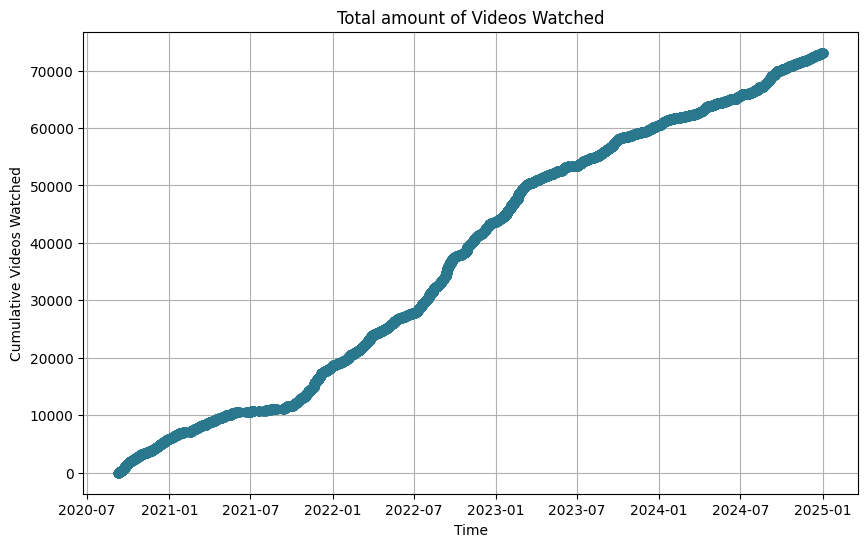

In [7]:
first_video_time = df['time'].iloc[0]
print("The first video was watched on:", first_video_time.date())

plt.figure(figsize=(10, 6))
plt.plot(df['time'], range(len(df)), marker='o', linestyle='-', alpha=0.7, markeredgecolor='#2A788E', markerfacecolor='#2A788E')
plt.title('Total amount of Videos Watched')
plt.xlabel('Time')
plt.ylabel('Cumulative Videos Watched')
plt.grid()

plt.show()


### Number of Videos Watched per Year
- Not including 2025

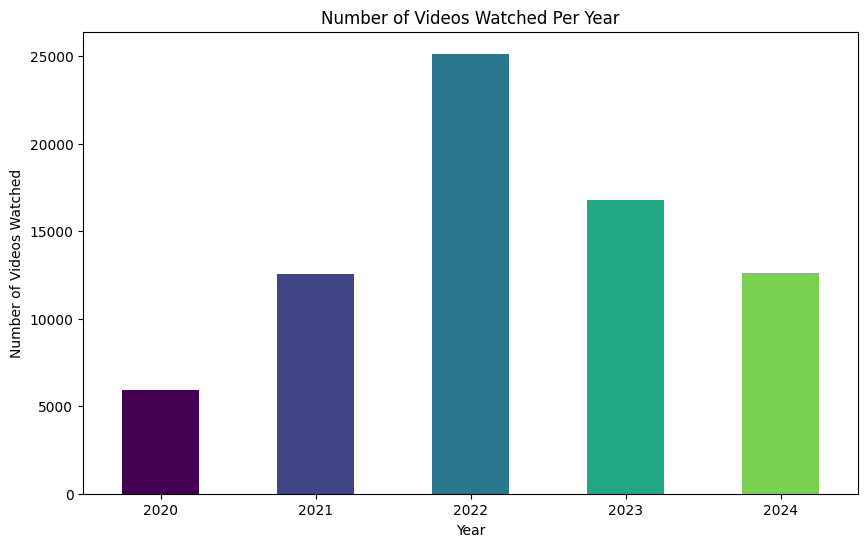

In [8]:
videos_per_year = df['time'].dt.year.value_counts().sort_index()
videos_per_year = videos_per_year[videos_per_year.index != 2025]

colors = ["#440154", "#414487","#2A788E", "#22A884", "#7AD151"]

plt.figure(figsize=(10, 6))
videos_per_year.plot(kind='bar', color= colors)
plt.title('Number of Videos Watched Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Videos Watched')
plt.xticks(rotation=0)
plt.show()

### Number of Videos Watched per Month

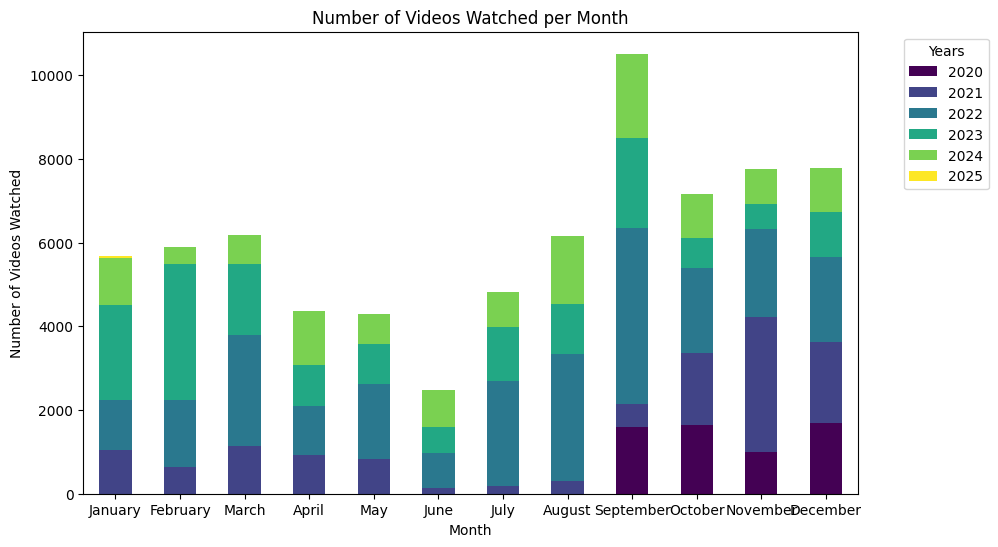

In [9]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
videos_per_month_year = df.groupby([df['time'].dt.month_name(), df['time'].dt.year]).size().unstack(fill_value=0).reindex(months)

videos_per_month_year.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Number of Videos Watched per Month')
plt.xlabel('Month')
plt.ylabel('Number of Videos Watched')
plt.legend(title='Years', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

### Number of Videos Watched per Day of Week

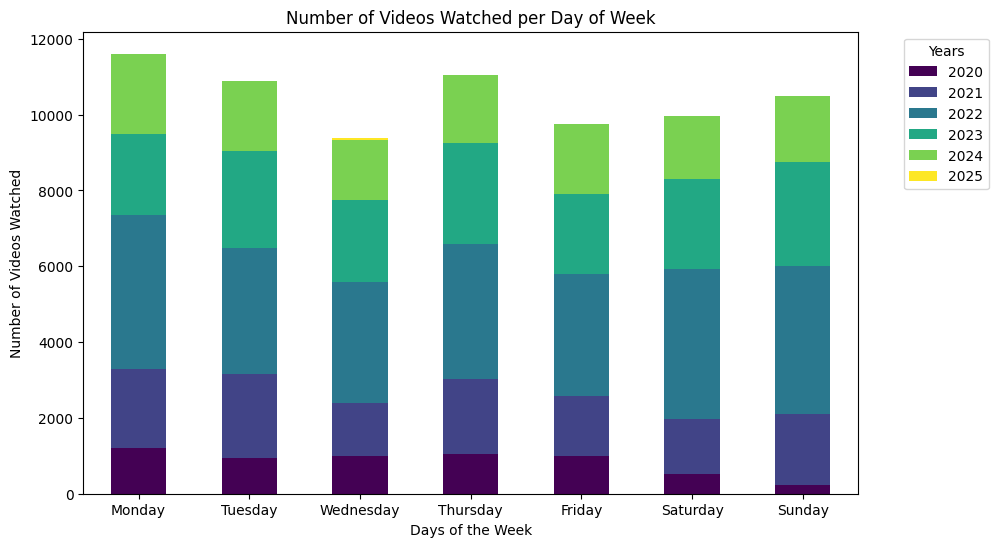

In [10]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
videos_per_day_year = df.groupby([df['time'].dt.day_name(), df['time'].dt.year]).size().unstack(fill_value=0).reindex(days)

videos_per_day_year.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Number of Videos Watched per Day of Week')
plt.xlabel('Days of the Week')
plt.ylabel('Number of Videos Watched')
plt.legend(title='Years', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

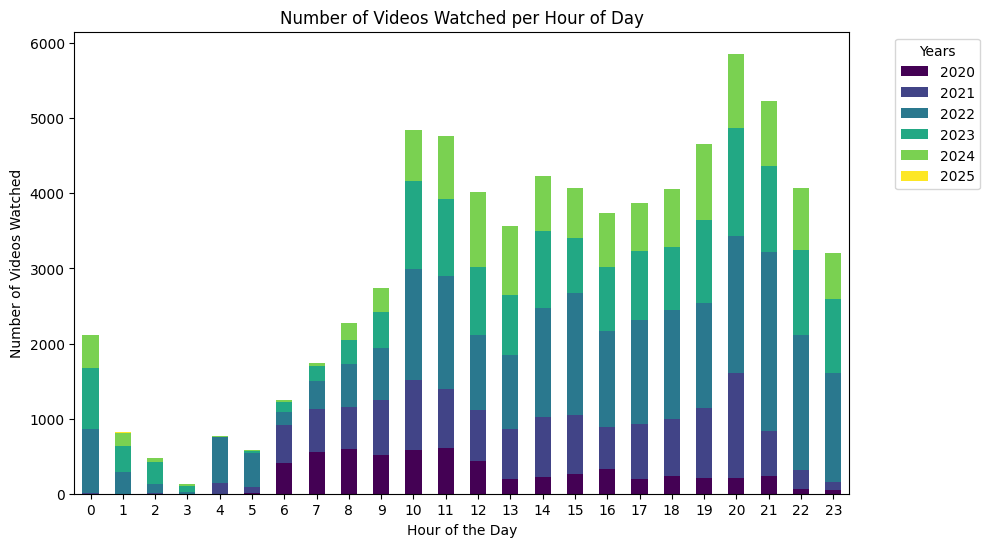

In [11]:
videos_per_hour_year = df.groupby([df['time'].dt.hour, df['time'].dt.year]).size().unstack(fill_value=0)

videos_per_hour_year.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Number of Videos Watched per Hour of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Videos Watched')
plt.legend(title='Years', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

The most-watched channel is 'Sabancı Seahawks Ultimate' with 658 videos watched.


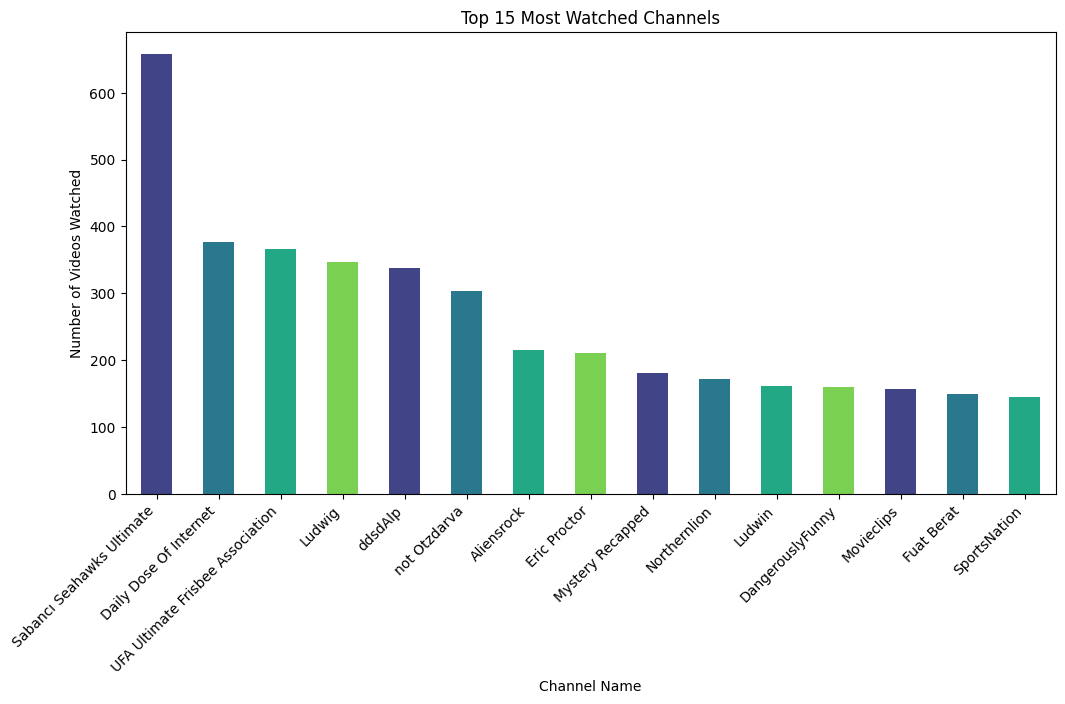

In [12]:
# Filter out rows with missing or invalid subtitles
df_filtered = df[df['subtitles'].apply(lambda x: isinstance(x, list))].copy()

# Extract channel names
df_filtered['channel_name'] = df_filtered['subtitles'].apply(lambda x: x[0]['name'])

# Count occurrences of each channel
channel_counts = df_filtered['channel_name'].value_counts()

# Display the most-watched channel
most_watched_channel = channel_counts.idxmax()
most_watched_count = channel_counts.max()

print(f"The most-watched channel is '{most_watched_channel}' with {most_watched_count} videos watched.")

# Plot the top 15 most-watched channels
channel_counts.head(15).plot(kind='bar', figsize=(12, 6), color=["#414487","#2A788E", "#22A884", "#7AD151"])
plt.title('Top 15 Most Watched Channels')
plt.xlabel('Channel Name')
plt.ylabel('Number of Videos Watched')
plt.xticks(rotation=45, ha='right')
plt.show()


## 3. Hypothesis Testing

### Hypothesis: "The top 5 channels account for more than %10 percent of videos watched"
- H0 = The top 5 channels make up for %10 percent or less of the videos watched.        ($H_0: p \leq 0.10$)
- HA = The top 5 channels make up for more than %10 percent of the videos I watched.    ($H_a: p > 0.10$)
- (The value was 50 percent at first but I then realized it's too much of a percentage so I tuned it down to 10)


### Observed Values

In [13]:
total_videos = df_filtered['title'].count()

# observed channel views
observed_top_5_channels = channel_counts.head(5).sum()

p_obs = observed_top_5_channels / total_videos * 100

print("Total amount of videos watched:", total_videos)
print("Total amount of videos watched from top 5 channels:", observed_top_5_channels)
print("Observed proportion of videos watched from top 5 channels:", p_obs)

Total amount of videos watched: 64962
Total amount of videos watched from top 5 channels: 2086
Observed proportion of videos watched from top 5 channels: 3.211108032388165


### Randomization Test
- Simulating the random proportions assuming the p0 is equal to 0.10.

In [14]:
n = total_videos
sample_size = 1000

#null hypothesis proportion
p0 = 0.10

np.random.seed(42)

random_proportions = []
for i in range(sample_size):
    sample = np.random.choice([0, 1], p=[1 - p0, p0], size=n)

    sample_proportion = sample.sum() / len(sample) * 100
    random_proportions.append(sample_proportion)

random_proportions = np.array(random_proportions)

### Calculating p-value
- What is the probability of getting a sample proportion where the proportion of the videos are more the observed proportion we got? (p_obs = 3.21)
$$P(p̂_{proportion} > p_{obs} | H_0)$$

In [15]:
p_value = len(random_proportions[random_proportions >= p_obs]) / sample_size
print("Calculated p-value:", p_value)

Calculated p-value: 1.0


### Result of the test
- Using a significance value of alpha = 0.05
- Calculated p value > alpha
$$ pvalue > \alpha$$
$$ 1.0 > 0.05$$
- We fail to refuse the null hypothesis.
- It was obvious from the proportion of our observation but we have proved it statistically aswell.
### Findings from the test 
- The top 5 channels I watch only make up 3% of the videos I watch.
- This shows that I don't stick to watching the same Youtuber's and the content Im watching is always changing.
- To see this better I want to create a stacked area chart of the channels Im watching.

In [ ]:
grouped = df_filtered.groupby([df['time'].dt.date, 'channel_name']).size().unstack(fill_value=0)

years = [2020, 2021, 2022, 2023, 2024]

for year in years:
    yearly_data = df_filtered[df_filtered['time'].dt.year == year]
    grouped = yearly_data.groupby([yearly_data['time'].dt.date, 'channel_name']).size().unstack(fill_value=0)

grouped.plot(kind='area', stacked=True, figsize=(12, 6), colormap='viridis', alpha=0.7)
plt.title('Daily Videos Watched by Channel Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Videos Watched')
plt.legend(title='Channels', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

KeyboardInterrupt: 